# Analyzing Campaign Contributions from 2016

In this lab, we will work with a cleaned Donald Trump contributions CSV file. We will ask questions whose results we might use in a story, graphic or interactive.

The data file we will be working with is found here:

./trump_contribs.csv

Information about the data fields can be found at the Federal Elections Commission Contributions by individuals file description.

Usually it is good to ask big picture questions that we can as a benchmark. The table has only one numeric field, amount, so we will be limited somewhat.

First let’s answer these questions:

* How many total records of contributions?
* How much was given in total?
* How much was given on average?

Recall that our file has contributions from two committees:

**NOTE: You do not need to download these. They contain current and historical data. We are only looking at 2016.**

* The first is [Donald J. Trump for President, Inc.](http://docquery.fec.gov/cgi-bin/fecimg/?C00580100), his campaign committee. (Filer_id: C00580100) 
* The second is [Great America PAC](http://docquery.fec.gov/cgi-bin/fecimg/?C00608489), a Super PAC that supported Trump in the 2016 election. (Filer_id: C00608489)

Run the same analysis for each, so we can see how they compare.

Trump’s campaign has said he’s won widespread support from donors who are willing to give him small contributions. According to [The Washington Post](https://www.washingtonpost.com/politics/trump-supporters-eager-to-drain-the-swamp-help-fill-gop-coffers/2017/10/05/ec214f22-a53d-11e7-ade1-76d061d56efa_story.html?utm_term=.2fb48b4a5b50) in 2017, he beat Bernie Sanders and Hillary Clinton in the number of people contributing $200 or less.  Let’s check that out now with the data.

Generate the counts overall and separately for the two committees.

It might be interesting to see how the contributions flow in from month to month.

Finally, you are going to look at how Trump did with contributions in states he won, but had voted for Barack Obama in 2012:

* Florida
* Iowa
* Michigan
* Ohio
* Pennsylvania

How did he do in those states compared to the rest of the United States, overall and month by month?

Trump is often on the road at campaign rallies. Can you find any dates and locations that have a higher than usual number of contributions that came in for him? That could hint at a fundraising event.

Finally, let's look at contributions of $250 and under both nationally in the flipped states to test the statement that Trump had a great deal of support from small donors.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load the file from the csv
Since we are only using the amount, the filer_id, the state and the transaction date we can selectively load only those columns along with the nicarid which is unique for each row. Since we are only looking at those columns, we are working with the original file rather than a cleaned-up version from Exercise 05.01 (to save on data storage).

This is a judgement call; if you are still exploring and will want to look at other columns you can include those also. But paring down the columns to what we need saves on memory usage and increases performance.

In [2]:
#Load the file

# We can specify the datatypes for the column
dtypes = {'filer_id': str,
'state':str,
'amount':np.float64,
'trans_date':str}
#,'nicarid':str}

# And We can specify the the columns to load using the usecols parameter
cols = ['filer_id',
'state',
'amount',
'trans_date']
#        ,'nicarid']

# Open the data file
path = './trump_contribs.csv'
trump_contribs_df = pd.read_csv(path, usecols = cols, dtype=dtypes )

print("Shape: ", trump_contribs_df.shape)

# have to use print since this isn't the last statement
print(trump_contribs_df.head())

print(trump_contribs_df.shape)


Shape:  (139590, 4)
    filer_id state trans_date  amount
0  C00580100    TN   12312016   100.0
1  C00580100    CA   12312016   250.0
2  C00580100    TX   12312016   100.0
3  C00580100    FL   12312016   250.0
4  C00580100    TX   12312016   100.0
(139590, 4)


#### A little carpentry
We need some columns we didn't address in our clean-up in Module 5.
- Extract two new columns for year (yyyy) and  month (yyyymm) from trans_date. 
- Convert trans_date to yyyymmdd format in a column named date. 
- Drop the original trans_date when this is complete.
- Convert the new columns to integers for performance reasons.

In [3]:
trump_contribs_df['year'] = trump_contribs_df['trans_date'].str.slice(4,8)
trump_contribs_df['month'] = trump_contribs_df['trans_date'].str.slice(4,8) + trump_contribs_df['trans_date'].str.slice(0,2)
trump_contribs_df['date'] = trump_contribs_df['trans_date'].str.slice(4,8) + trump_contribs_df['trans_date'].str.slice(0,4)
trump_contribs_df = trump_contribs_df.drop('trans_date', axis = 1)
trump_contribs_df.head()

,filer_id,state,amount,year,month,date
0,C00580100,TN,100.0,2016,201612,20161231
1,C00580100,CA,250.0,2016,201612,20161231
2,C00580100,TX,100.0,2016,201612,20161231
3,C00580100,FL,250.0,2016,201612,20161231
4,C00580100,TX,100.0,2016,201612,20161231


In [4]:
type(trump_contribs_df)

column_names_list = trump_contribs_df.columns.tolist()
print(column_names_list)

['filer_id', 'state', 'amount', 'year', 'month', 'date']


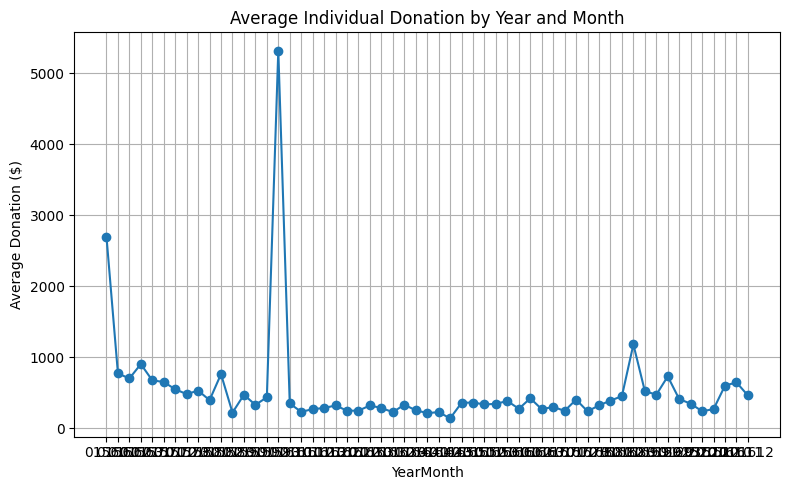

In [5]:
summary = trump_contribs_df.groupby(['year', 'month'], as_index=False)['amount'].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(summary['month'], summary['amount'], marker='o', linestyle='-')

plt.title('Average Individual Donation by Year and Month')
plt.xlabel('YearMonth')
plt.ylabel('Average Donation ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

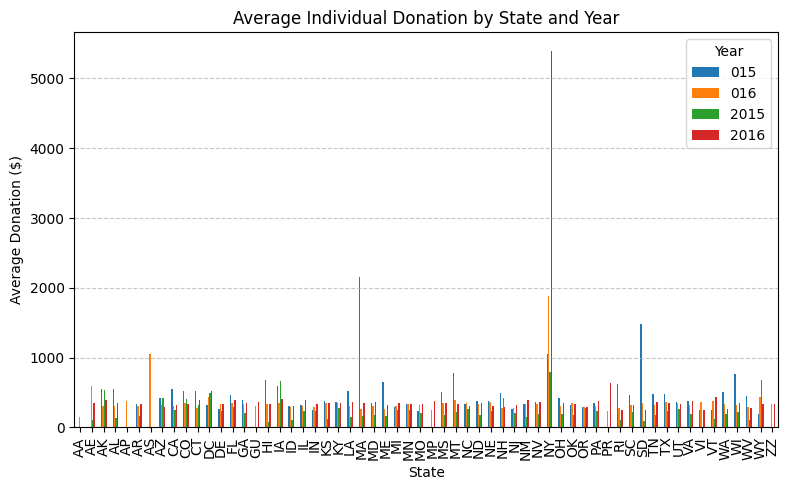

In [7]:

# Group by year and state, compute average donation
summary = trump_contribs_df.groupby(['year', 'state'], as_index=False)['amount'].mean()

# Pivot for plotting
pivot = summary.pivot(index='state', columns='year', values='amount')

# Plot
pivot.plot(kind='bar', figsize=(8, 5))

plt.title('Average Individual Donation by State and Year')
plt.xlabel('State')
plt.ylabel('Average Donation ($)')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

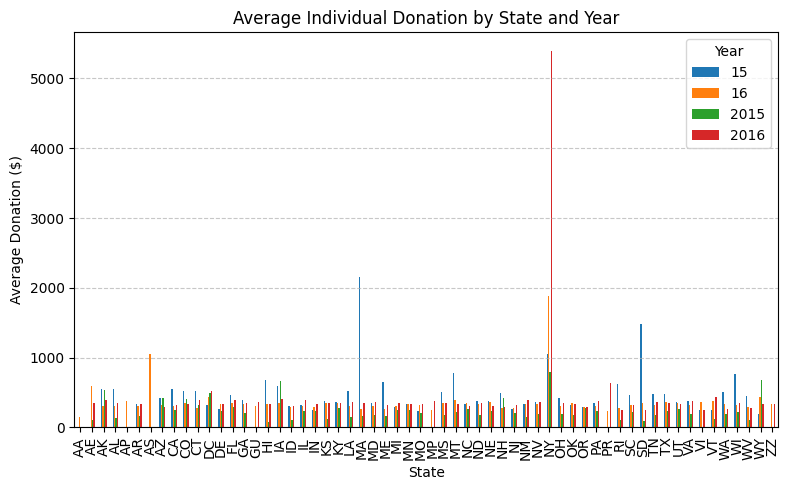

In [8]:

df = pd.DataFrame(trump_contribs_df)


# --- Fix the year column ---
# Strip non-digits, pad to 4 digits, and convert to int
df['year'] = df['year'].astype(str).str.extract(r'(\d+)')[0].str.zfill(4).astype(int)

# Group by year and state, compute average donation
summary = df.groupby(['year', 'state'], as_index=False)['amount'].mean()

# Pivot for plotting
pivot = summary.pivot(index='state', columns='year', values='amount')

# Plot
pivot.plot(kind='bar', figsize=(8, 5))

plt.title('Average Individual Donation by State and Year')
plt.xlabel('State')
plt.ylabel('Average Donation ($)')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

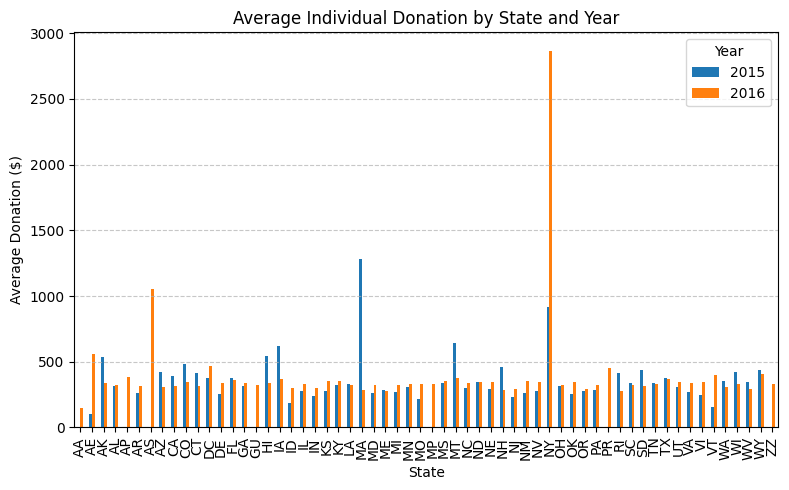

In [9]:
df = pd.DataFrame(trump_contribs_df)


# --- Normalize the year column ---
def normalize_year(y):
    y = str(y).strip()
    # Extract just the digits
    y = ''.join(filter(str.isdigit, y))
    if len(y) == 2:       # e.g. "15" → 2015
        return int("20" + y)
    elif len(y) == 3:     # e.g. "015" → 2015
        return int("2" + y)
    elif len(y) == 4:     # e.g. "2015" → 2015
        return int(y)
    else:
        return None

df['year'] = df['year'].apply(normalize_year)

# Group by year and state, compute average donation
summary = df.groupby(['year', 'state'], as_index=False)['amount'].mean()

# Pivot for plotting
pivot = summary.pivot(index='state', columns='year', values='amount')

# Plot
pivot.plot(kind='bar', figsize=(8, 5))

plt.title('Average Individual Donation by State and Year')
plt.xlabel('State')
plt.ylabel('Average Donation ($)')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
trump_contribs_df['year'] = trump_contribs_df['year'].astype(int)
trump_contribs_df['month'] = trump_contribs_df['month'].astype(int)
trump_contribs_df['date'] = trump_contribs_df['date'].astype(int)
trump_contribs_df.dtypes

filer_id     object
state        object
amount      float64
year          int64
month         int64
date          int64
dtype: object

#### Analysis
If you recall from Module 4, one consideration is that there are negative contributions. Those negative amounts you see for contributions are refunds. Typically this happens with individual contributions to candidate committees because [those limits are so low](https://www.fec.gov/help-candidates-and-committees/candidate-taking-receipts/contribution-limits/).

Your TA has not determined a clean way to match up a contribution and its corresponding refund using this dataset. Therefore, we will subtract the count of the rows for negative amounts from the total records and just add the negative amounts in to the totals.

Let's add a column to use for the row count and make it 1 for a positive amount and -1 for a negative amount. There are a number of ways to do this conditional assignment. We'll use np.where() and make sure to cast the 1 and -1 as integers. Here are some references the discuss different ways to do this: 

https://datatofish.com/if-condition-in-pandas-dataframe/

https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column


In [11]:
trump_contribs_df['row_ind'] = np.where(trump_contribs_df['amount']>0, np.int64(1), np.int64(-1))

# check our work
print(trump_contribs_df[trump_contribs_df['row_ind'] == 1].head())
print(trump_contribs_df[trump_contribs_df['row_ind'] == -1].head())

    filer_id state  amount  year   month      date  row_ind
0  C00580100    TN   100.0  2016  201612  20161231        1
1  C00580100    CA   250.0  2016  201612  20161231        1
2  C00580100    TX   100.0  2016  201612  20161231        1
3  C00580100    FL   250.0  2016  201612  20161231        1
4  C00580100    TX   100.0  2016  201612  20161231        1
     filer_id state  amount  year   month      date  row_ind
7   C00580100    CA  -100.0  2016  201612  20161231       -1
11  C00580100    CA  -250.0  2016  201612  20161231       -1
12  C00580100    NC  -250.0  2016  201612  20161231       -1
27  C00580100    VA  -250.0  2016  201612  20161230       -1
44  C00580100    FL  -100.0  2016  201612  20161230       -1


#### Totals

We can obtain the total contribution records, the sum of the amounts, and the average of the amounts with separate lines of code. An advantage of this approach is we can format individual amounts as money and use comma separators easily.

In [12]:
total_contribs = trump_contribs_df['row_ind'].sum()
total_amount = trump_contribs_df['amount'].sum()
average_amount = trump_contribs_df['amount'].mean()

In [13]:
print('Total contributions: ',"{:,}".format(total_contribs ) )
print('Total amount contributed: ', "${:,.2f}".format(total_amount) )
print('Average contribution: ', "${:,.2f}".format(average_amount) )

Total contributions:  137,702
Total amount contributed:  $65,329,708.00
Average contribution:  $468.01


We can also get all these amounts at the same time, but it is a little awkward if we are not grouping by anything. The result will be a Series with each data summary item on a separate row, rather than as columns. As a series, every item must be the same datatype, which will be a float. 

First we will create a second amount column, amount2, that is just a copy of amount so we can sum one column and get the average on the other one.
- We aggregate for each column using the appropriate function. Both the column name and the function name need to be in quotes.
- Then we can rename the indexes for the rows in the series for more meaningful names.

We can enclose the full command in parentheses for easy reading. Without the parentheses you will get a syntax error unless you write it as one long command.

In [14]:
pd.options.display.float_format = '{:.2f}'.format

trump_contribs_df['amount2'] = trump_contribs_df['amount']
nat =(trump_contribs_df
    .agg({'row_ind':'sum', 'amount': 'sum', 'amount2': 'mean'})
    .rename(index={'row_ind':'Total Records', 'amount':'Total Amount', 'amount2': 'Average Amount'})
)
print(nat)

Total Records      137702.00
Total Amount     65329708.00
Average Amount        468.01
dtype: float64


We can do something similar by grouping by month. This time, since we are using groupby, our result will be a dataframe.
Notice the column we group by becomes the index and the column name is the name of the index, not a column name. 

Since we can format the float columns using pd.options.display.float_format, we can use a dollar sign and commas as well as specifying two decimal places.

In [15]:
pd.options.display.float_format = '${:,.2f}'.format

nat_mon =(trump_contribs_df.groupby([ 'month'])
    .agg({'row_ind':'sum', 'amount': 'sum', 'amount2': 'mean'})
    .rename(columns={'row_ind':'Total Records', 'amount':'Total Amount', 'amount2': 'Average Amount'})
)
print(nat_mon)
print(nat_mon.index)
nat_mon.index.name = 'Month'
print(nat_mon.index)

        Total Records   Total Amount  Average Amount
month                                               
1560                1      $2,700.00       $2,700.00
1561               28     $23,250.00         $775.00
1562               30     $23,924.00         $703.65
1563                8      $7,250.00         $906.25
1570               85     $57,518.00         $676.68
1571               93     $62,194.00         $654.67
1572              131     $73,379.00         $551.72
1573              137     $66,251.00         $483.58
1580              476    $254,919.00         $533.30
1581              326    $130,718.00         $398.53
1582              305    $233,388.00         $765.21
1583               33      $7,368.00         $223.27
1590              158     $75,918.00         $474.49
1591              259     $87,381.00         $332.25
1592              190     $84,166.00         $438.36
1593               17     $90,373.00       $5,316.06
1610              230     $80,941.00         $

If we want the month to remain as a column, we can reset the index which will assign an integer to each row.

In [16]:
nat_mon =(trump_contribs_df.groupby([ 'month'])
    .agg({'row_ind':'sum', 'amount': 'sum', 'amount2': 'mean'})
    .reset_index()
    .rename(columns={'row_ind':'Total Records', 'amount':'Total Amount', 'amount2': 'Average Amount', 'month':'Month'})
)
print(nat_mon)


     Month  Total Records   Total Amount  Average Amount
0     1560              1      $2,700.00       $2,700.00
1     1561             28     $23,250.00         $775.00
2     1562             30     $23,924.00         $703.65
3     1563              8      $7,250.00         $906.25
4     1570             85     $57,518.00         $676.68
5     1571             93     $62,194.00         $654.67
6     1572            131     $73,379.00         $551.72
7     1573            137     $66,251.00         $483.58
8     1580            476    $254,919.00         $533.30
9     1581            326    $130,718.00         $398.53
10    1582            305    $233,388.00         $765.21
11    1583             33      $7,368.00         $223.27
12    1590            158     $75,918.00         $474.49
13    1591            259     $87,381.00         $332.25
14    1592            190     $84,166.00         $438.36
15    1593             17     $90,373.00       $5,316.06
16    1610            230     $

### <span style="background-color:yellow">Your Turn</span>
1. Find the aggregated statistics for each of the two committees.
1. Find the aggregated statistics for each of the two committees by month.
1. Create a dataframe for just the states of Florida, Iowa, Michigan, Ohio, and Pennsylvania.
1. Find the aggregated statistics for the states of Florida, Iowa, Michigan, Ohio, and Pennsylvania.
1. Find the aggregated statistics for the states of Florida, Iowa, Michigan, Ohio, and Pennsylvania by month.
1. Create a dataframe for national donations `$250` or less. What are the aggregated statistics for those donations?
1. What are the aggregated statistics for national donations `$250` or less by month?
1. Create a dataframe for donations `$250` or less from the states of Florida, Iowa, Michigan, Ohio, and Pennsylvania and find the aggregated statistics for those donations.
1. What are the aggregated statistics for donations `$250` or less for flipped states by month?

In [17]:
# Your Code Here
# M6L1Q1 
# Find the aggregated statistics for each of the two committees.
#--------------------------------------




In [18]:
# Your Code Here
# M6L1Q2
# Find the aggregated statistics for each of the two committees by month.
#--------------------------------------




In [ ]:
# Your Code Here
# M6L1Q3
# Create a dataframe for just the states of Florida, Iowa, Michigan, Ohio, and Pennsylvania.
#--------------------------------------



In [ ]:
# Your Code Here
# M6L1Q4
# Find the aggregated statistics for the states of Florida, Iowa, Michigan, Ohio, and Pennsylvania.
#--------------------------------------



In [ ]:
# Your Code Here
# M6L1Q5
# Find the aggregated statistics for the states of Florida, Iowa, Michigan, Ohio, and Pennsylvania by month.
# Make sure you print all rows
#--------------------------------------



In [ ]:
# Your Code Here
# M6L1Q6
# Create a dataframe for national donations $250 or less. What are the aggregated statistics for those donations?
#--------------------------------------



In [ ]:
# Your Code Here
# M6L1Q7
# What are the aggregated statistics for national donations $250 or less by month?
# Make sure you print all rows
#--------------------------------------


In [ ]:
# Your Code Here
# M6L1Q8
# Create a dataframe for donations $250 or less from the states of Florida, Iowa, 
# Michigan, Ohio, and Pennsylvania and find the aggregated statistics for those donations.
#--------------------------------------


In [ ]:
# Your Code Here
# M6L1Q9
# What are the aggregated statistics for donations $250 or less for flipped states by month?
# Make sure you print all rows
#--------------------------------------


#### Record your observations and story ideas here:

